In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
# import seaborn as sb
import math
import pylab
import scipy.stats as stats
%matplotlib inline

In [2]:
#  read csv file into dataframe
data = pd.read_csv('listings_detail.csv')

/Users/shripalmodani/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
cols = [
    'id',
    'host_id',
    'zipcode',
    'property_type',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'bed_type',
    'price',
    'number_of_reviews',
    'review_scores_rating',
    'host_listings_count',
    'availability_30',
    'minimum_nights',
    'bathrooms'
]
data = data[cols]

In [4]:
data.head()

,id,host_id,zipcode,property_type,room_type,accommodates,bedrooms,beds,bed_type,price,number_of_reviews,review_scores_rating,host_listings_count,availability_30,minimum_nights,bathrooms
0,18461891,916092,11105,Apartment,Entire home/apt,2,0.0,1.0,Real Bed,$110.00,0,NaN,1.0,0,6,1.0
1,20702398,1457680,NaN,House,Private room,2,1.0,1.0,Real Bed,$50.00,2,100.0,1.0,19,1,1.0
2,6627449,13886510,10464,Apartment,Entire home/apt,3,1.0,1.0,Real Bed,$125.00,21,95.0,1.0,28,3,1.0
3,19949243,1149260,10464,Boat,Entire home/apt,4,1.0,3.0,Real Bed,$100.00,0,NaN,1.0,30,3,1.0
4,1886820,9815788,10464,House,Entire home/apt,4,3.0,3.0,Real Bed,$300.00,0,NaN,1.0,30,7,3.0


In [5]:
# print(data.isnull().sum())

In [6]:
# deleting the NaN values
original = len(data)
data = data.dropna(how='any', subset=['zipcode', 'property_type', 'bedrooms', 'beds', 'bathrooms'])
print('NaN values removed:', original - len(data))

NaN values removed: 851


In [7]:
# changing the price formatting
data['price'] = (data['price'].str.replace(r'[^-+\d.]', '').astype(float))

# ZipCode conversion
data['zipcode'] = data['zipcode'].str.replace(r'-\d+', '')

In [8]:
# removing inconsistent values
print('Total invalid accommodates(0) :', len(data[data['accommodates'] == 0]))
print('Total invalid Beds(0):', len(data[data['beds'] == 0]))
print('Total invalid Bedrooms(0) :', len(data[data['bedrooms'] == 0]))
print('Total Invalid listings( $0.00):', len(data[data['price'] == 0.00]))

data = data[data['accommodates'] != 0]
data = data[data['bedrooms'] != 0]
data = data[data['beds'] != 0]
data = data[data['price'] != 0.00]

Total invalid accommodates(0) : 0
Total invalid Beds(0): 2
Total invalid Bedrooms(0) : 3972
Total Invalid listings( $0.00): 48


In [9]:
# checking the data now, its clean now
data.head()

,id,host_id,zipcode,property_type,room_type,accommodates,bedrooms,beds,bed_type,price,number_of_reviews,review_scores_rating,host_listings_count,availability_30,minimum_nights,bathrooms
2,6627449,13886510,10464,Apartment,Entire home/apt,3,1.0,1.0,Real Bed,125.0,21,95.0,1.0,28,3,1.0
3,19949243,1149260,10464,Boat,Entire home/apt,4,1.0,3.0,Real Bed,100.0,0,NaN,1.0,30,3,1.0
4,1886820,9815788,10464,House,Entire home/apt,4,3.0,3.0,Real Bed,300.0,0,NaN,1.0,30,7,3.0
5,5557381,28811542,10464,House,Private room,4,1.0,1.0,Real Bed,69.0,94,97.0,1.0,0,3,1.0
6,19609887,137892083,10464,Apartment,Entire home/apt,7,2.0,5.0,Real Bed,150.0,3,100.0,1.0,24,2,1.0


In [10]:
# calculate the total reviews with missing values
print('Total review scores ratings with missing values:', len(data['review_scores_rating'][data['review_scores_rating'].isnull()]))

Total review scores ratings with missing values: 8954


In [11]:
print(data.isnull().sum())

id                          0
host_id                     0
zipcode                 10428
property_type               0
room_type                   0
accommodates                0
bedrooms                    0
beds                        0
bed_type                    0
price                       0
number_of_reviews           0
review_scores_rating     8954
host_listings_count       209
availability_30             0
minimum_nights              0
bathrooms                   0
dtype: int64


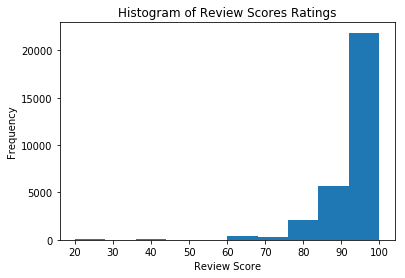

In [12]:
# visualize classification of review scores ratings
plt.hist(data['review_scores_rating'][~data['review_scores_rating'].isnull()])
plt.title("Histogram of Review Scores Ratings")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()

In [13]:
data.dtypes

id                        int64
host_id                   int64
zipcode                  object
property_type            object
room_type                object
accommodates              int64
bedrooms                float64
beds                    float64
bed_type                 object
price                   float64
number_of_reviews         int64
review_scores_rating    float64
host_listings_count     float64
availability_30           int64
minimum_nights            int64
bathrooms               float64
dtype: object

In [14]:
data['zipcode']=data.zipcode.astype(str)

In [15]:
data.dtypes

id                        int64
host_id                   int64
zipcode                  object
property_type            object
room_type                object
accommodates              int64
bedrooms                float64
beds                    float64
bed_type                 object
price                   float64
number_of_reviews         int64
review_scores_rating    float64
host_listings_count     float64
availability_30           int64
minimum_nights            int64
bathrooms               float64
dtype: object

In [16]:
# turning NaN scores with 0 reviews into 'No Reviews'
idx_vals = data['review_scores_rating'][data['number_of_reviews'] == 0].index.values.tolist()
data.loc[idx_vals, ('review_scores_rating')] = data['review_scores_rating'][data['number_of_reviews'] == 0].replace('NaN', 'No Reviews')

# removing inconsistent NaN values
data = data[~data['review_scores_rating'].isnull()]

# ensuring all zipcodes are of length 5
data = data[data['zipcode'].map(len) == 5]

In [17]:
print('Total review scores ratings with missing values:', len(data['review_scores_rating'][data['review_scores_rating'].isnull()]))

Total review scores ratings with missing values: 0


In [18]:
# Accomodation classification
print('Accomodation Numbers: ', np.unique(data['accommodates']))
for i in range(1, 17):
    print('Accommodations {}:'.format(i), len(data[data['accommodates'] == i]))

Accomodation Numbers:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Accommodations 1: 3086
Accommodations 2: 10101
Accommodations 3: 2443
Accommodations 4: 3464
Accommodations 5: 946
Accommodations 6: 1238
Accommodations 7: 277
Accommodations 8: 393
Accommodations 9: 65
Accommodations 10: 147
Accommodations 11: 20
Accommodations 12: 52
Accommodations 13: 9
Accommodations 14: 21
Accommodations 15: 8
Accommodations 16: 43


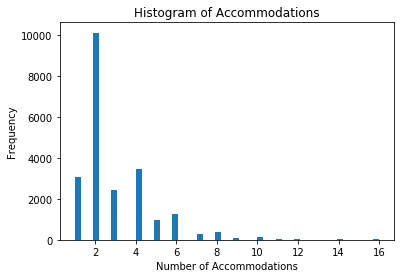

In [19]:
# visualual classification of price (target variable)
plt.hist(data['accommodates'], bins=50)
plt.title("Histogram of Accommodations")
plt.xlabel("Number of Accommodations")
plt.ylabel("Frequency")
plt.show()

In [20]:
print('Classification of number of Beds: ', np.unique(data['beds']))
for i in range(1, 17):
    print('Beds {}:'.format(i), len(data[data['beds'] == i]))

Classification of number of Beds:  [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  18.  40.]
Beds 1: 14168
Beds 2: 4894
Beds 3: 1824
Beds 4: 810
Beds 5: 316
Beds 6: 163
Beds 7: 60
Beds 8: 30
Beds 9: 13
Beds 10: 10
Beds 11: 5
Beds 12: 7
Beds 13: 5
Beds 14: 1
Beds 15: 1
Beds 16: 3


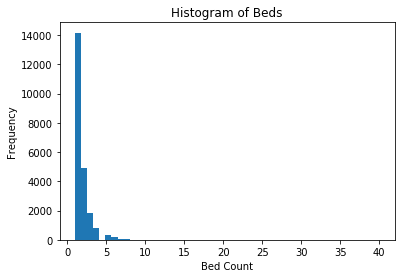

In [21]:
# visualize classification of beds
plt.hist(data['beds'], bins=50)
plt.title("Histogram of Beds")
plt.xlabel("Bed Count")
plt.ylabel("Frequency")
plt.show()

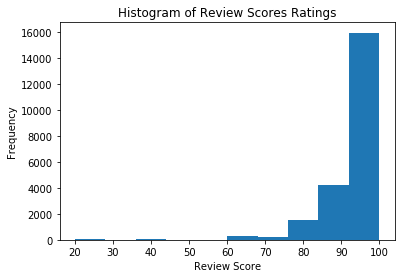

In [22]:
# visualize classification of review scores ratings
plt.hist(data['review_scores_rating'][~data['review_scores_rating'].isnull()])
plt.title("Histogram of Review Scores Ratings")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()

In [23]:
# chnaging review_scores_rating into intervals
def convert_scores_buckets(val):
    if val == 'No Reviews':
        return 'No Reviews'
    elif val >= 95.0:
        return '95-100'
    elif val >= 90.0 and val < 95.0:
        return '90-94'
    elif val >= 85.0 and val < 90.0:
        return '85-89'
    elif val >= 80.0 and val < 85.0:
        return '80-84'
    elif val >= 70.0 and val < 80.0:
        return '70-79'
    elif val >= 60.0 and val < 70.0:
        return '60-69'
    elif val >= 50.0 and val < 60.0:
        return '50-59'
    elif val >= 40.0 and val < 50.0:
        return '40-49'
    elif val >= 30.0 and val < 40.0:
        return '30-39'
    elif val >= 20.0 and val < 30.0:
        return '20-29'
    elif val >= 10.0 and val < 20.0:
        return '10-19'
    elif val < 10.0:
        return '0-9'
    
data['review_scores_rating'] = data['review_scores_rating'].apply(convert_scores_buckets)
print('Unique Values in the Column:', np.unique(data['review_scores_rating']))

Unique Values in the Column: ['20-29' '30-39' '40-49' '50-59' '60-69' '70-79' '80-84' '85-89' '90-94'
 '95-100']


In [24]:
print('Number of remaining records:', len(data))

Number of remaining records: 22313


In [25]:
print(data.isnull().sum())

id                        0
host_id                   0
zipcode                   0
property_type             0
room_type                 0
accommodates              0
bedrooms                  0
beds                      0
bed_type                  0
price                     0
number_of_reviews         0
review_scores_rating      0
host_listings_count     118
availability_30           0
minimum_nights            0
bathrooms                 0
dtype: int64


In [26]:
# encode categorical variables
zipcode_dummies = pd.get_dummies(data['zipcode'])
property_dummies = pd.get_dummies(data['property_type'])
room_dummies = pd.get_dummies(data['room_type'])
bed_dummies = pd.get_dummies(data['bed_type'])
ratings_scores_dummies = pd.get_dummies(data['review_scores_rating'])

# replace the old columns with our new one-hot encoded ones
df = pd.concat((data.drop(['zipcode', \
    'property_type', 'room_type', 'bed_type', 'review_scores_rating'], axis=1), \
    zipcode_dummies.astype(int), property_dummies.astype(int), \
    room_dummies.astype(int), bed_dummies.astype(int), ratings_scores_dummies.astype(int)), \
    axis=1)

print('Number of Columns:', len(df.columns))

Number of Columns: 235


In [27]:
# move target predictor 'price' to the end of the dataframe
cols = list(df.columns.values)
idx = cols.index('price')
rearrange_cols = cols[:idx] + cols[idx+1:] + [cols[idx]]
df = df[rearrange_cols]

In [28]:
df.head()

,id,host_id,accommodates,bedrooms,beds,number_of_reviews,host_listings_count,availability_30,minimum_nights,bathrooms,...,30-39,40-49,50-59,60-69,70-79,80-84,85-89,90-94,95-100,price
2,6627449,13886510,3,1.0,1.0,21,1.0,28,3,1.0,...,0,0,0,0,0,0,0,0,1,125.0
5,5557381,28811542,4,1.0,1.0,94,1.0,0,3,1.0,...,0,0,0,0,0,0,0,0,1,69.0
6,19609887,137892083,7,2.0,5.0,3,1.0,24,2,1.0,...,0,0,0,0,0,0,0,0,1,150.0
7,7949480,119445,2,1.0,1.0,31,1.0,29,1,1.0,...,0,0,0,0,0,0,0,0,1,101.0
11,1936633,10018391,2,1.0,2.0,49,1.0,0,3,1.0,...,0,0,0,0,0,0,0,0,1,115.0


In [29]:
# convert non-categorical variables to floats and standardize
def standardize_col(col):
    mean = np.mean(col)
    std = np.std(col)
    return col.apply(lambda x: (x - mean) / std)

non_cat_vars = ['accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'host_listings_count', 'availability_30', 'minimum_nights', 'bathrooms']
for col in non_cat_vars:
    df[col] = df[col].astype(float)
    df[col] = standardize_col(df[col])
    


In [30]:
df.head()

,id,host_id,accommodates,bedrooms,beds,number_of_reviews,host_listings_count,availability_30,minimum_nights,bathrooms,...,30-39,40-49,50-59,60-69,70-79,80-84,85-89,90-94,95-100,price
2,6627449,13886510,0.025891,-0.427395,-0.545710,-0.072227,-0.094294,2.487829,-0.067513,-0.331292,...,0,0,0,0,0,0,0,0,1,125.0
5,5557381,28811542,0.547748,-0.427395,-0.545710,1.977504,-0.094294,-0.702867,-0.067513,-0.331292,...,0,0,0,0,0,0,0,0,1,69.0
6,19609887,137892083,2.113321,1.102601,2.897119,-0.577640,-0.094294,2.032015,-0.148238,-0.331292,...,0,0,0,0,0,0,0,0,1,150.0
7,7949480,119445,-0.495967,-0.427395,-0.545710,0.208558,-0.094294,2.601782,-0.228964,-0.331292,...,0,0,0,0,0,0,0,0,1,101.0
11,1936633,10018391,-0.495967,-0.427395,0.314997,0.713971,-0.094294,-0.702867,-0.067513,-0.331292,...,0,0,0,0,0,0,0,0,1,115.0


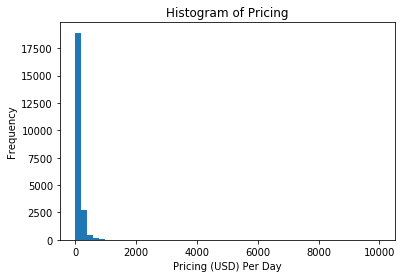

In [31]:
# visualize classification of price (target variable)
plt.hist(df['price'], bins=50)
plt.title("Histogram of Pricing")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

In [32]:
# log transform the response 'price'
df['price_log'] = df['price'].apply(lambda x: math.log(x))

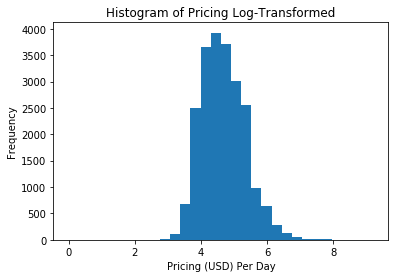

In [33]:
# visualize distribution of price (target variable)
plt.hist(df['price_log'], bins=30)
plt.title("Histogram of Pricing Log-Transformed")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

In [61]:
# put the data into new csv
df.to_csv('listings_detail_clean.csv', index=False)